# ACCESS-OM2-025 Preliminary Analysis

This notebook documents our first attempt to run and analyse output from the ACCESS-OM2 Pre-release, implemented at 0.25°.


## Current Status

### Runs So Far

|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|025deg_jra55_ryf_spinup1 | JRA55 RYF9091| This is our initial 0.25° test. Ran for a decade before sea ice build-up overwhelmed us!  | Aborted after 10 years.| 
|025deg_jra55_ryf | JRA55 RYF9091| This is our initial 0.25° testwith the sea ice parameter fixed.  | Up to 11 years.| 


### To Do Next
* 

**Last updated 18 July 2017**

In [1]:
%matplotlib inline

from cosima_cookbook import build_index, expts, get_nc_variable
import matplotlib.pyplot as plt
import xarray as xr

# select only mom025 experiments
expts = [expt for expt in expts if ('access' in expt or '9091' in expt)][:3]
print(expts)

build_index()

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:43782' processes=8 cores=8>
['access-om2-025/025deg_jra55_ryf', 'access-om2-025/025deg_jra55_ryf_spinup1', 'mom025/mom025_jra_ryf9091']
Searching /g/data3/hh5/tmp/cosima/
Searching /g/data1/v45/APE-MOM
Found 35326 .nc files
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Files already indexed: 35089
Files found but not yet indexed: 238
Indexing new .nc files...

Found 1384 new variables
Saving results in database...
Indexing complete.


True

Using 35 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]
Using 101 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]


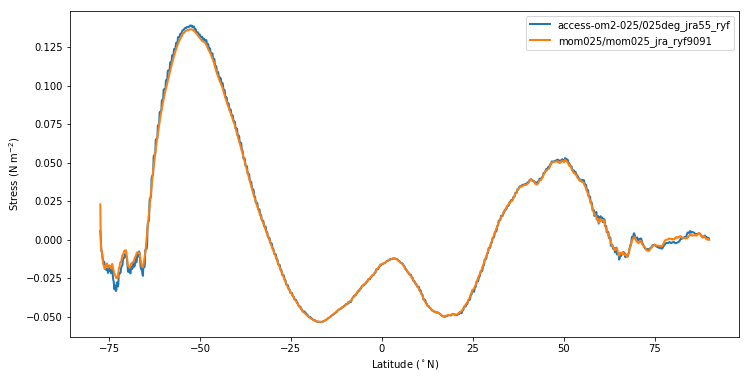

In [4]:
plt.figure(figsize=(12,6))
for e in expts[::2]:
    tau_x = get_nc_variable(e,'ocean_month.nc','tau_x',chunks=None,n=1)
    tau_x.mean('time').mean('xu_ocean').plot(linewidth=2,label=e)

plt.xlabel('Latitude ($^\circ$N)')
plt.ylabel('Stress (N m$^{-2}$)')
plt.legend(loc='upper right',fontsize=10)

Using 35 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 9 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 101 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]


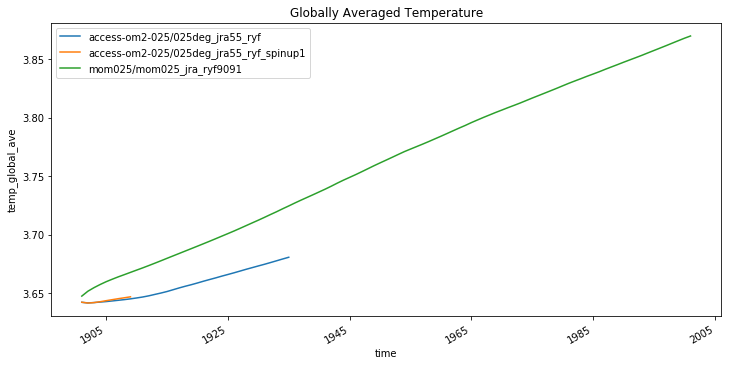

In [11]:
plt.figure(figsize=(12,6))
for e in expts:
    get_nc_variable(e,'ocean_scalar.nc','temp_global_ave',
                    time_units = 'days since 1900-01-01').resample('A','time').plot(label=e)
    
plt.legend()
plt.title('Globally Averaged Temperature')

Using 35 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 9 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 101 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]


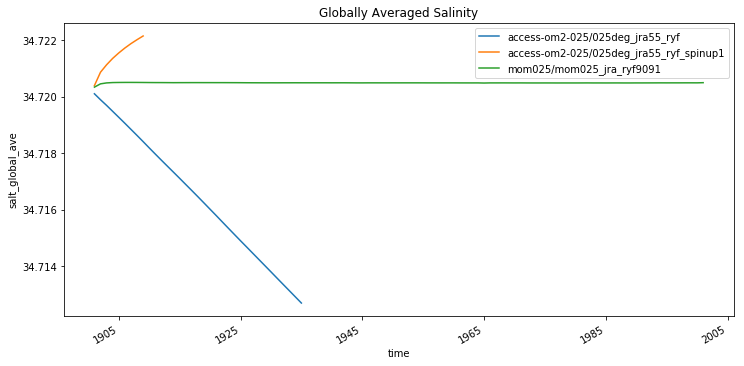

In [16]:
plt.figure(figsize=(12,6))
for e in expts:
    get_nc_variable(e,'ocean_scalar.nc','salt_global_ave',
                    time_units = 'days since 1900-01-01').resample('A','time').plot(label=e)
    
plt.legend()
plt.title('Globally Averaged Salinity')

Using 35 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 9 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 101 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]


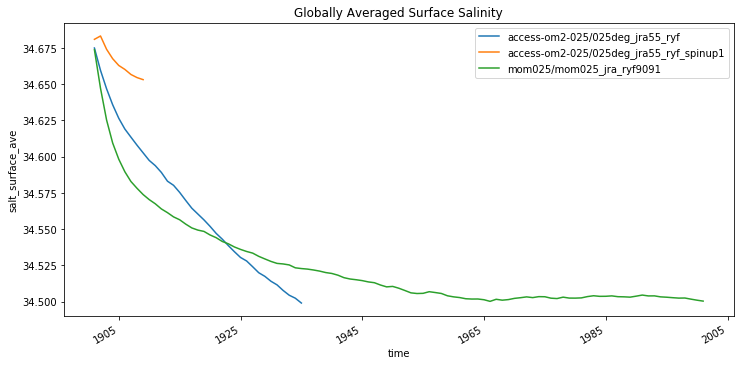

In [12]:
plt.figure(figsize=(12,6))
for e in expts:
    get_nc_variable(e,'ocean_scalar.nc','salt_surface_ave',
                    time_units = 'days since 1900-01-01').resample('A','time').plot(label=e)
    
plt.legend()
plt.title('Globally Averaged Surface Salinity')

Using 35 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 9 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]
Using 101 ncfiles
chunking info ('time', 'scalar_axis') [1, 1]


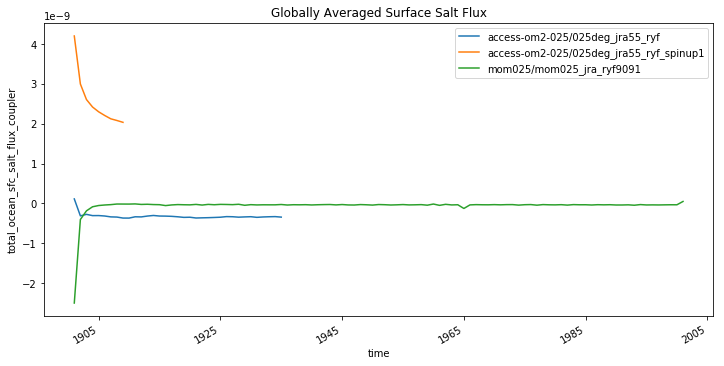

In [15]:
plt.figure(figsize=(12,6))
for e in expts:
    get_nc_variable(e,'ocean_scalar.nc','total_ocean_sfc_salt_flux_coupler',
                    time_units = 'days since 1900-01-01').resample('A','time').plot(label=e)
    
plt.legend()
plt.title('Globally Averaged Surface Salt Flux')

{'xloc': 840, 'ymin': 110, 'ymax': 250}
Using 36 ncfiles
chunking info ('time', 'yt_ocean', 'xu_ocean') [1, 540, 720]
Using 101 ncfiles
chunking info ('time', 'yt_ocean', 'xu_ocean') [1, 540, 720]


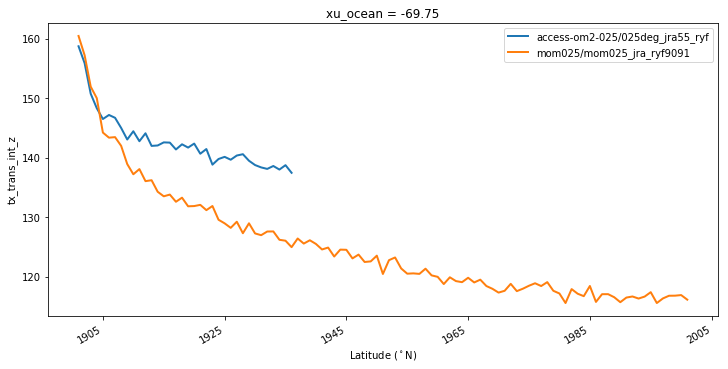

In [10]:
plt.figure(figsize=(12,6))
StraightDicts = { 'DrakePassage' :  {'xloc':840,'ymin':110,'ymax':250},}
TransDict = StraightDicts['DrakePassage']
print(TransDict)
for e in expts[::2]:
    tx = get_nc_variable(e,'ocean_month.nc','tx_trans_int_z',chunks={'yt_ocean':200},
                         time_units = 'days since 1900-01-01').isel(xu_ocean=TransDict['xloc'])
    tx_trans = tx[:,TransDict['ymin']:TransDict['ymax']]
    if "access" in e:
        transport = tx.sum('yt_ocean')*1.0e-9
    else:
        transport = tx.sum('yt_ocean')
    transport.resample('A','time').plot(label=e, linewidth=2)


plt.xlabel('Latitude ($^\circ$N)')
#plt.ylabel('Stress (N m$^{-2}$)')
plt.legend(loc='upper right',fontsize=10)

In [28]:
import numpy as np
def plot_psi(psi, expt, clev=np.arange(-20,20,2)):
    #x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

    plt.contourf(psi.grid_yu_ocean, psi.potrho, psi, cmap=plt.cm.PiYG,levels=clev,extend='both')
    cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    plt.contour(psi.grid_yu_ocean, psi.potrho, psi, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi.grid_yu_ocean, psi.potrho, psi, levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    #plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    plt.title('Overturning in %s' % expt)

In [14]:
%%time
## One of our problems here is that the zonal sum and density-wise cumulative sum in calculate_Ψ is so slow.
## A possible work-around is to calculate them once, save as a netCDF file, and then simply read in multiple
## netcdf files when it is time to average them, or to construct timeseries.

## Here is a first cut of doing that ... 
import os
from glob import glob
DataDir = '/g/data3/hh5/tmp/cosima/'
for expt in expts:
    # Find list of output directories
    ExpDir = os.path.join(DataDir, expt)
    if "access" in expt:
        FileList = glob(os.path.join(ExpDir, 'output*/ocean'))
    else:
        FileList = glob(os.path.join(ExpDir, 'output*'))    
    FileList.sort()
    
    for fn in FileList:
        MOCFile = os.path.join(fn, 'overturning.nc')
    
        # Have I Processed this one yet?
        if not os.path.exists(MOCFile):
            OceanFile = os.path.join(fn, 'ocean.nc')
            if os.path.exists(OceanFile):
                dsx = xr.open_dataset(OceanFile, decode_times=False, engine='netcdf4')
                psi = dsx.ty_trans_rho.isel(time=0).sum('grid_xt_ocean').cumsum('potrho')
                dsx.close()
                psi.to_netcdf(MOCFile, mode='w', engine='netcdf4')
                print('Saved ', MOCFile)

CPU times: user 11 ms, sys: 12 ms, total: 23 ms
Wall time: 190 ms


In [12]:
plt.figure(figsize=(15,15)) 
nplot = 0
for e in expts: 
    nplot += 1
    ty = get_nc_variable(e,'overturning.nc','ty_trans_rho',n=1,
                         time_units = 'days since 1900-01-01')
    
    plt.subplot(2,2,nplot)
    plot_psi(ty.mean('time'), e)

Using 36 ncfiles


NameError: name 'contiguous' is not defined

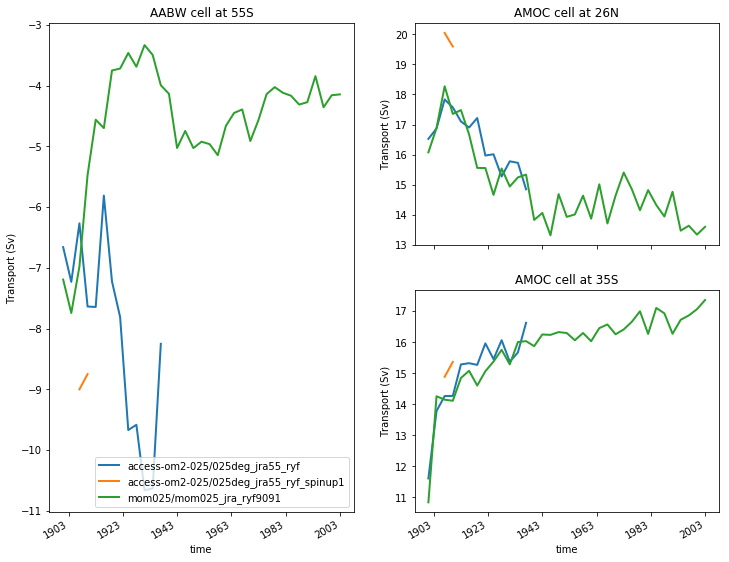

In [16]:
# plot timeseries of overturning
plt.figure(figsize=(12,10))
for expt in expts:
    ExpDir = os.path.join(DataDir, expt)
    if "access" in expt:
        FileList = glob(os.path.join(ExpDir, 'output*/ocean/overturning.nc'))
        svfac = 1.0e-9
    else:
        FileList = glob(os.path.join(ExpDir, 'output*/overturning.nc')) 
        svfac = 1.0
    FileList.sort()

    dsx = xr.open_mfdataset(FileList, concat_dim='time',decode_times=False, engine='netcdf4')*svfac
    dsx.time.attrs["units"] = 'days since 1900-01-01'
    dsx = xr.decode_cf(dsx, decode_times=True)
    
    plt.subplot(121)
    dsx.ty_trans_rho[:,60:,230].min('potrho').resample('3A',dim='time').plot(label=expt,linewidth=2) 
    ## still need to check sensitivity to the exaction location in the line above
    
    #Southern branch of the AMOC at 35S
    plt.subplot(224)
    dsx.ty_trans_rho[:,60:,345].max('potrho').resample('3A',dim='time').plot(label=expt,linewidth=2) 
    
    # AMOC at 26N
    plt.subplot(222)
    dsx.ty_trans_rho[:,60:,605].max('potrho').resample('3A',dim='time').plot(label=expt,linewidth=2) 

plt.subplot(121)
plt.legend(loc='lower right')
plt.title('AABW cell at 55S')
plt.ylabel('Transport (Sv)')

plt.subplot(222)
plt.title('AMOC cell at 26N')
plt.ylabel('Transport (Sv)')

plt.subplot(224)
plt.title('AMOC cell at 35S')
plt.ylabel('Transport (Sv)')